### Data Preparation and Feature Creation

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

132. Import and inspect the cars dataset (cars.csv)!

In [3]:
cars = pd.read_csv('cars.csv')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


133. __Transform__ the format in the model_year column to __full year format__ (e.g. 1970 instead of 70)!

In [9]:
cars.loc[:, 'model_year'].value_counts()

73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: model_year, dtype: int64

In [13]:
cars['model_year'] = cars.loc[:, 'model_year'].apply(lambda x: f'19{x}')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,1970,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,1970,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,1970,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,1970,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,1970,usa,ford torino


In [31]:
cars['model_year'] = pd.to_datetime(cars['model_year'], format= '%Y')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,1970-01-01,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,1970-01-01,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,1970-01-01,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,1970-01-01,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,1970-01-01,usa,ford torino


In [32]:
cars.loc[:, 'model_year'].value_counts()

1973-01-01    40
1978-01-01    36
1976-01-01    34
1982-01-01    31
1975-01-01    30
1970-01-01    29
1979-01-01    29
1980-01-01    29
1981-01-01    29
1971-01-01    28
1972-01-01    28
1977-01-01    28
1974-01-01    27
Name: model_year, dtype: int64

134. __Transform__ the __mpg__ column in way that the relationship with the horsepower feature is __linear__/closer to linear!<br> __Visualize__ before and after!<br> <br>
(Hint: Gallons per 100 miles might be a good format) 

In [44]:
cars.mpg.describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [45]:
cars.horsepower.describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [37]:
cars.mpg.value_counts()

13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9     1
16.9     1
18.2     1
22.3     1
44.0     1
Name: mpg, Length: 129, dtype: int64

In [38]:
cars.horsepower.value_counts()

150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
         ..
61.0      1
93.0      1
148.0     1
152.0     1
82.0      1
Name: horsepower, Length: 93, dtype: int64

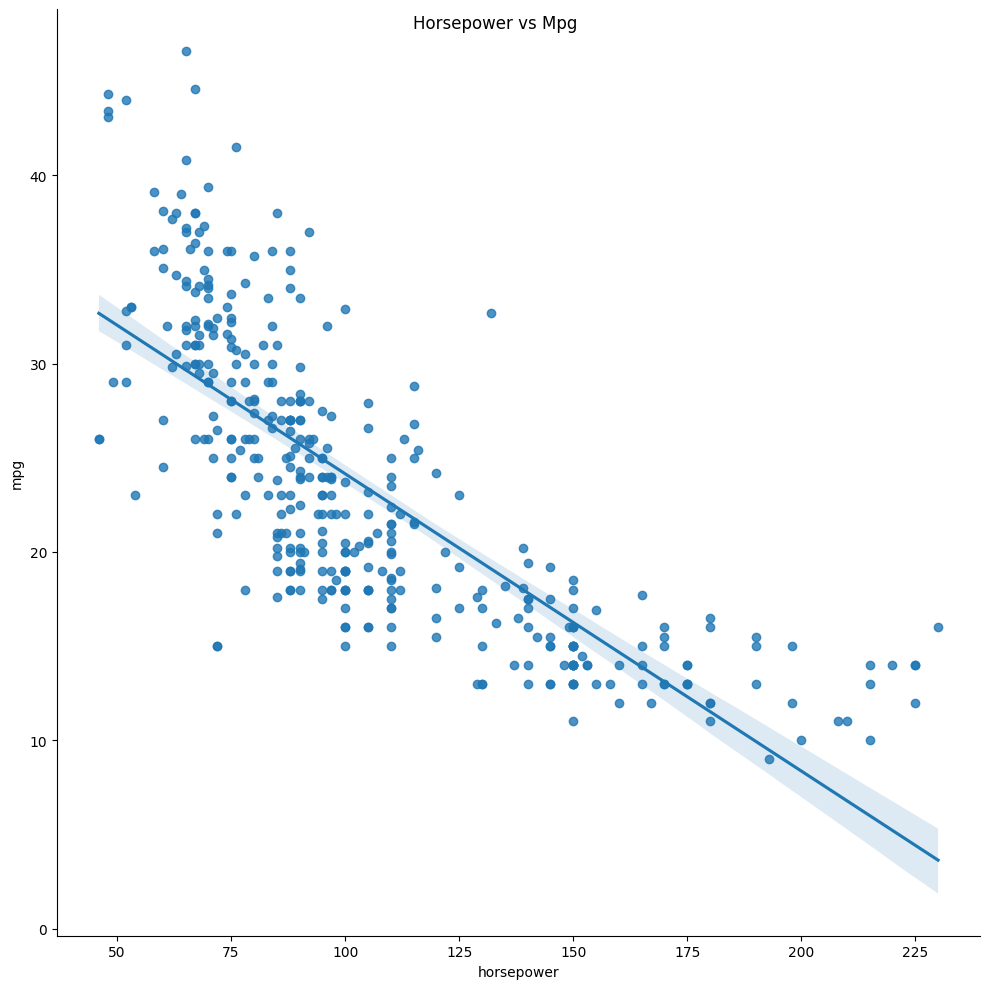

In [57]:
g = sns.lmplot(x = "horsepower", y = "mpg", data = cars, height=10, aspect=1)
g.fig.suptitle('Horsepower vs Mpg')
plt.show()

In [54]:
cars["gpm"] = (1/cars.mpg*100).round(2)

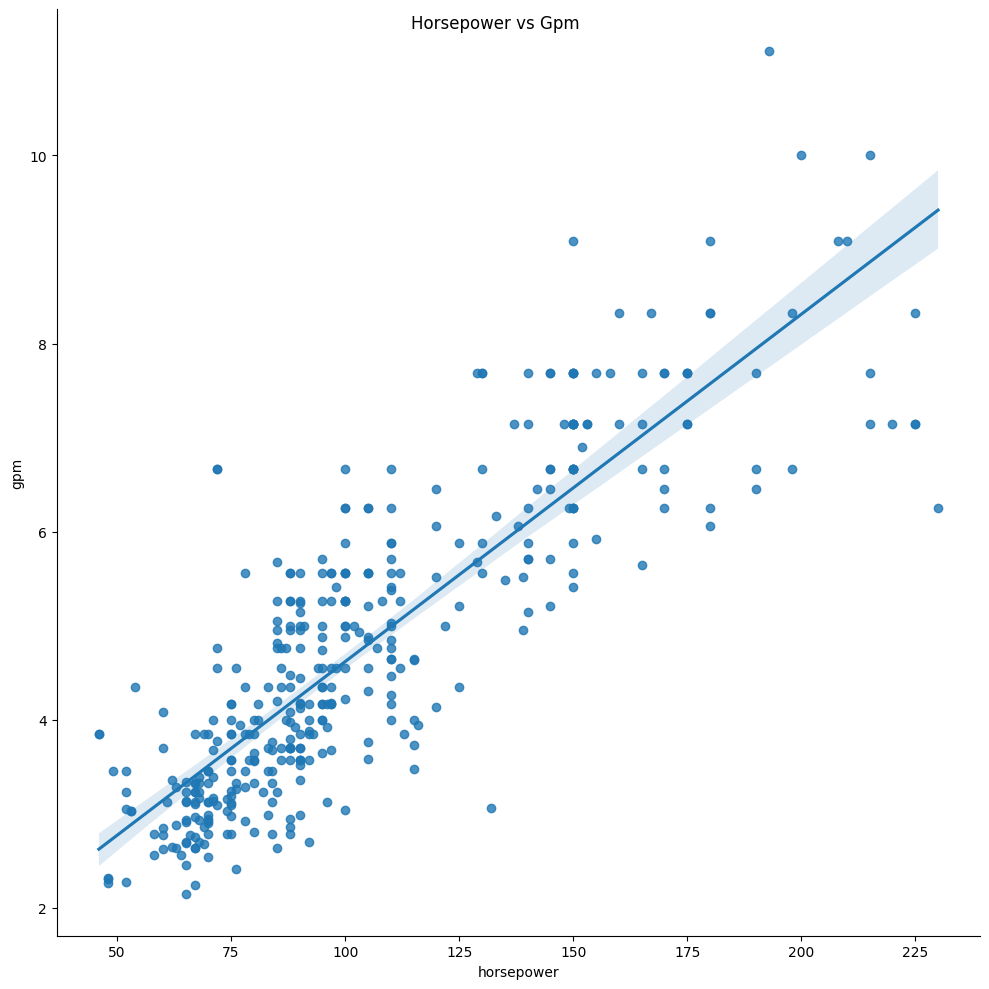

In [56]:
g = sns.lmplot(x = "horsepower", y = "gpm", data = cars, height=10, aspect=1)
g.fig.suptitle('Horsepower vs Gpm')
plt.show()

135. Create a __new column__ with the __manufacturer__ name!

In [58]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,gpm
0,18.0,8,307.0,130.0,3504,12.0,1970-01-01,usa,chevrolet chevelle malibu,5.56
1,15.0,8,350.0,165.0,3693,11.5,1970-01-01,usa,buick skylark 320,6.67
2,18.0,8,318.0,150.0,3436,11.0,1970-01-01,usa,plymouth satellite,5.56
3,16.0,8,304.0,150.0,3433,12.0,1970-01-01,usa,amc rebel sst,6.25
4,17.0,8,302.0,140.0,3449,10.5,1970-01-01,usa,ford torino,5.88


In [69]:
cars['manufacturer_name'] = cars.name.str.split(' ', n=1, expand = True).drop(columns = 1)
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,gpm,manufacturer_name
0,18.0,8,307.0,130.0,3504,12.0,1970-01-01,usa,chevrolet chevelle malibu,5.56,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,1970-01-01,usa,buick skylark 320,6.67,buick
2,18.0,8,318.0,150.0,3436,11.0,1970-01-01,usa,plymouth satellite,5.56,plymouth
3,16.0,8,304.0,150.0,3433,12.0,1970-01-01,usa,amc rebel sst,6.25,amc
4,17.0,8,302.0,140.0,3449,10.5,1970-01-01,usa,ford torino,5.88,ford


136. Add a __new column__ with the respective __continent__ (north america, asia, europe)!

In [70]:
cars['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [71]:
country_continent = {'usa': 'north america', 'japan': 'asia', 'europe' : 'europe'}

In [74]:
cars.origin.map(country_continent)

0      north america
1      north america
2      north america
3      north america
4      north america
           ...      
393    north america
394           europe
395    north america
396    north america
397    north america
Name: origin, Length: 398, dtype: object

In [73]:
cars['continent'] = cars.origin.map(country_continent)
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,gpm,manufacturer_name,continent
0,18.0,8,307.0,130.0,3504,12.0,1970-01-01,usa,chevrolet chevelle malibu,5.56,chevrolet,north america
1,15.0,8,350.0,165.0,3693,11.5,1970-01-01,usa,buick skylark 320,6.67,buick,north america
2,18.0,8,318.0,150.0,3436,11.0,1970-01-01,usa,plymouth satellite,5.56,plymouth,north america
3,16.0,8,304.0,150.0,3433,12.0,1970-01-01,usa,amc rebel sst,6.25,amc,north america
4,17.0,8,302.0,140.0,3449,10.5,1970-01-01,usa,ford torino,5.88,ford,north america


137. __Visualize__ and inspect whether there are any __extreme values__ / outliers in the __numerical columns__ that are worth to be __capped__ / __floored__!

In [75]:
cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,gpm
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,4.767211
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,1.658479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,2.150000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,3.450000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,4.350000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,5.710000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,11.110000


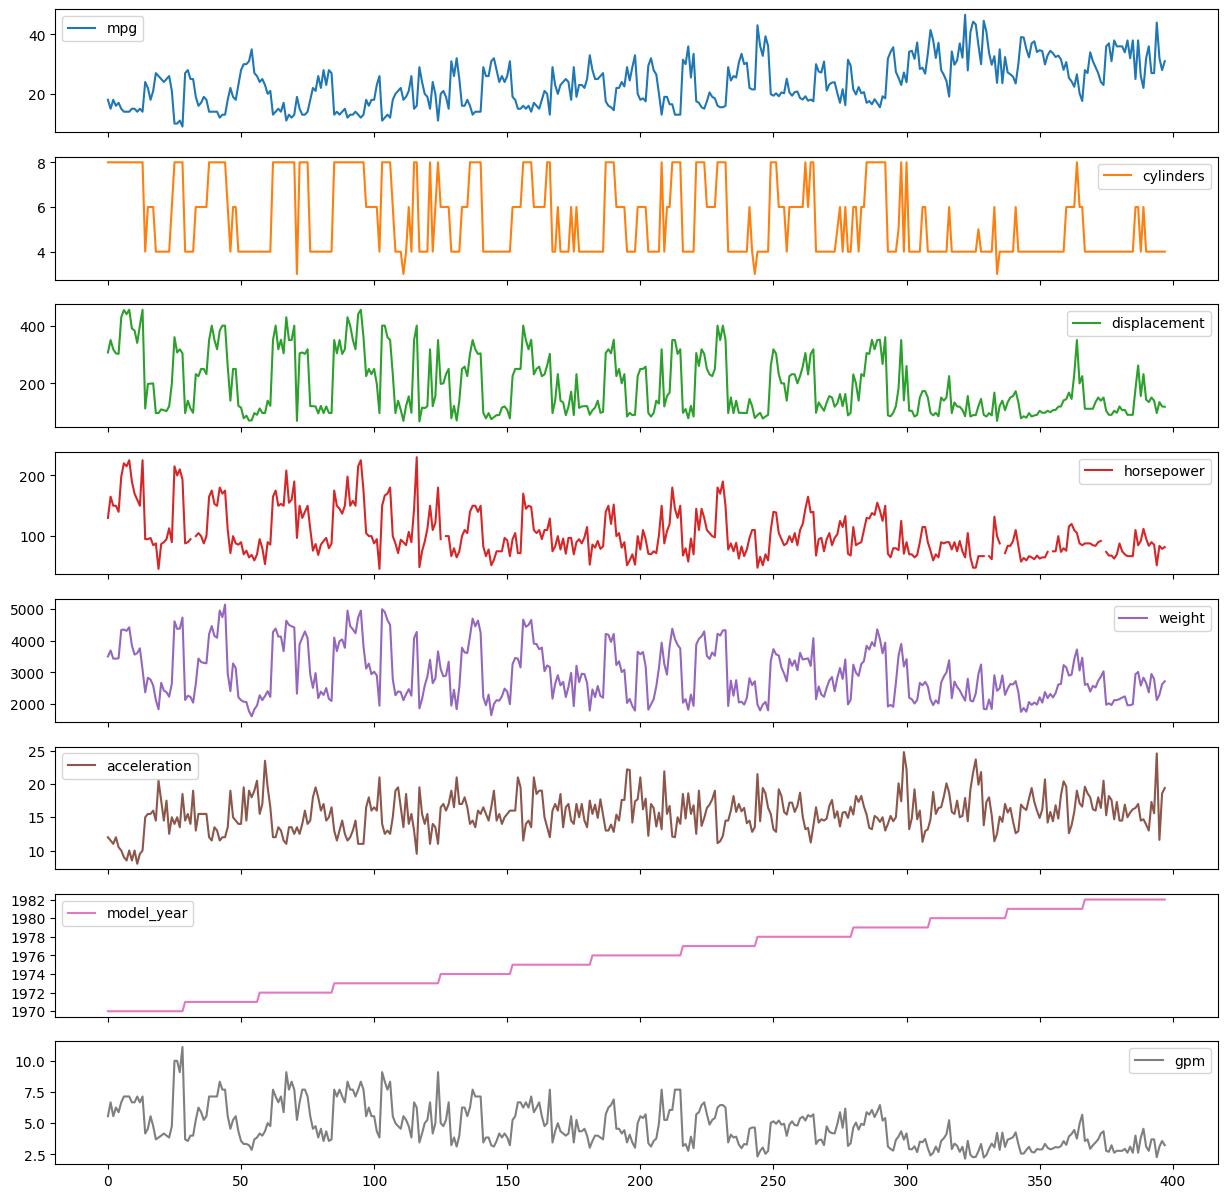

In [87]:
cars.plot(figsize = (15,15), subplots = True)
plt.show()

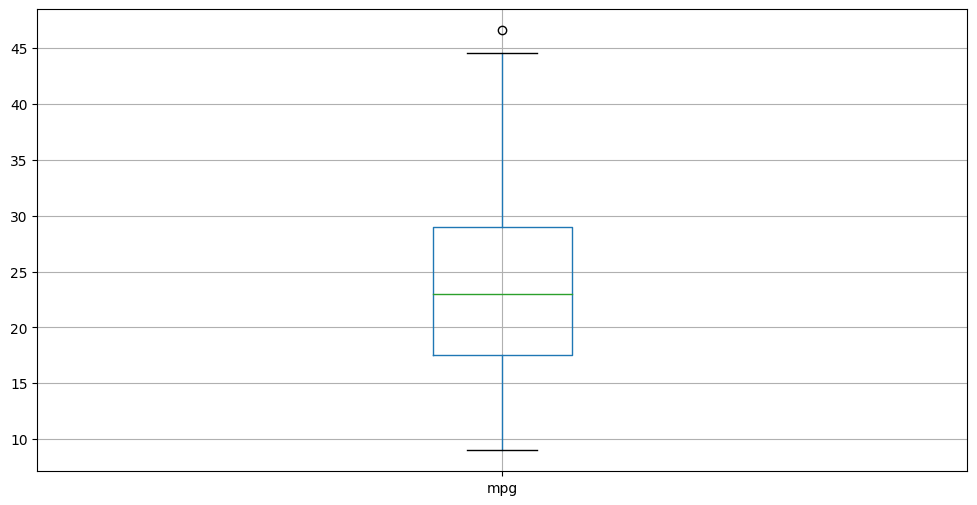

In [76]:
plt.figure(figsize = (12,6)) 
cars.boxplot("mpg")
plt.show()

In [83]:
cars.mpg.sort_values(ascending = False)

322    46.6
329    44.6
325    44.3
394    44.0
326    43.4
       ... 
103    11.0
67     11.0
25     10.0
26     10.0
28      9.0
Name: mpg, Length: 398, dtype: float64

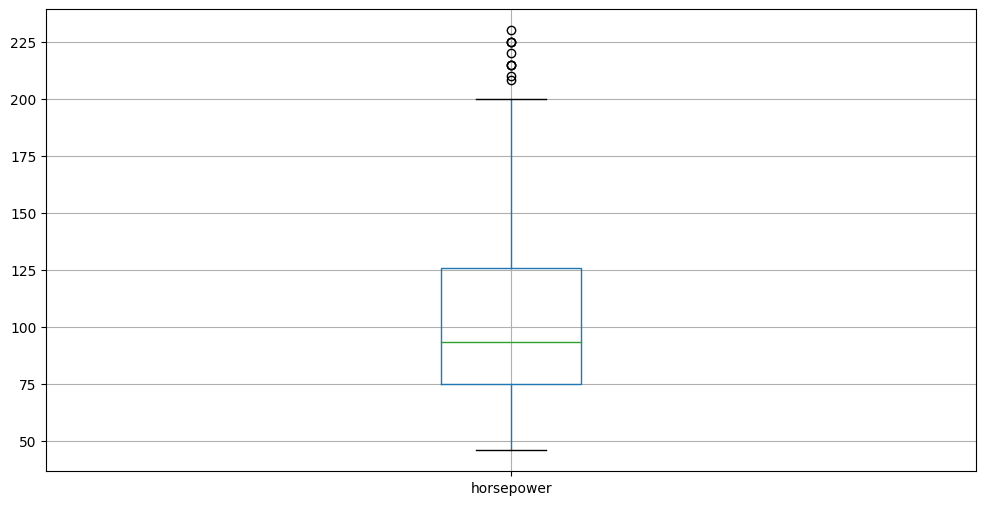

In [79]:
plt.figure(figsize = (12,6)) 
cars.boxplot("horsepower")
plt.show()

In [84]:
cars.horsepower.sort_values(ascending = False)

116    230.0
95     225.0
13     225.0
8      225.0
6      220.0
       ...  
126      NaN
330      NaN
336      NaN
354      NaN
374      NaN
Name: horsepower, Length: 398, dtype: float64

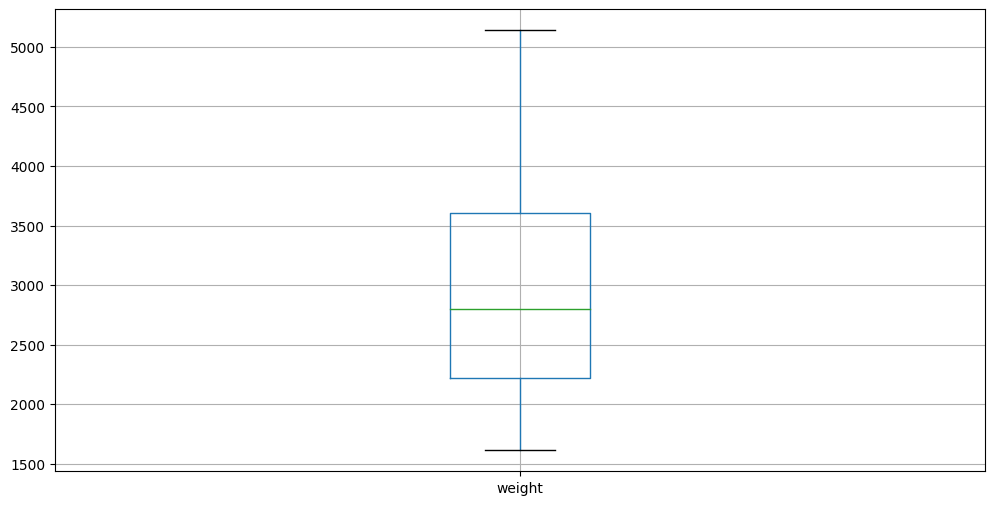

In [78]:
plt.figure(figsize = (12,6)) 
cars.boxplot("weight")
plt.show()

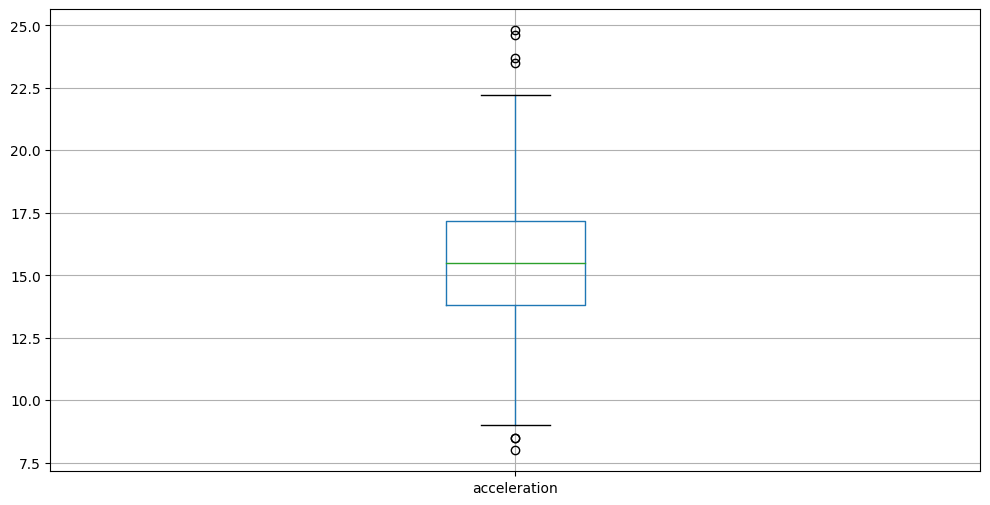

In [81]:
plt.figure(figsize = (12,6)) 
cars.boxplot("acceleration")
plt.show()

In [86]:
cars.acceleration.sort_values(ascending = False)

299    24.8
394    24.6
326    23.7
59     23.5
300    22.2
       ... 
116     9.5
6       9.0
7       8.5
9       8.5
11      8.0
Name: acceleration, Length: 398, dtype: float64

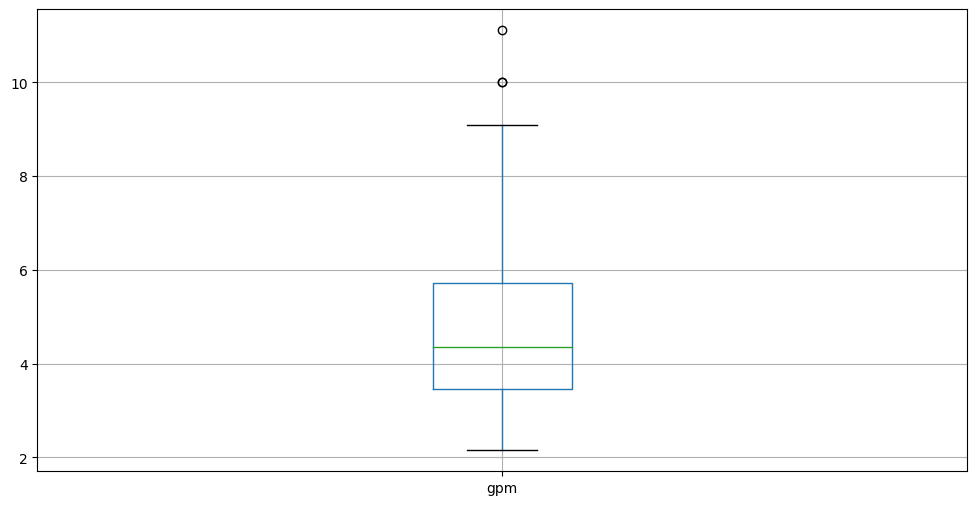

In [82]:
plt.figure(figsize = (12,6))
cars.boxplot("gpm")
plt.show()

138. __Bin / discretize__ the __weight__ column! The __25%__ of cars with the __lowest weight__ shall get the label __"light"__, the __25%__ of cars with the __highest weight__ shall get the label __"heavy"__ and the remaining __50%__ the label __"medium"__! Create a new column __"weight_cat"__!

In [90]:
labels =["light", "medium", "heavy"]
cars["weight_cat"] =  pd.qcut(cars.weight, [0, 0.25, 0.75, 1], precision = 0, labels = labels) 
cars.weight.value_counts()

1985    4
2130    4
2125    3
2945    3
2265    3
       ..
2875    1
3102    1
3664    1
2807    1
2625    1
Name: weight, Length: 351, dtype: int64

In [91]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,gpm,manufacturer_name,continent,weight_cat
0,18.0,8,307.0,130.0,3504,12.0,1970-01-01,usa,chevrolet chevelle malibu,5.56,chevrolet,north america,medium
1,15.0,8,350.0,165.0,3693,11.5,1970-01-01,usa,buick skylark 320,6.67,buick,north america,heavy
2,18.0,8,318.0,150.0,3436,11.0,1970-01-01,usa,plymouth satellite,5.56,plymouth,north america,medium
3,16.0,8,304.0,150.0,3433,12.0,1970-01-01,usa,amc rebel sst,6.25,amc,north america,medium
4,17.0,8,302.0,140.0,3449,10.5,1970-01-01,usa,ford torino,5.88,ford,north america,medium


139. __Drop__ the columns "cylinders", "displacement", "weight", "acceleration", "name", "mpg"!

In [94]:
cars.drop(columns = ["cylinders", "displacement", "weight", "acceleration", "name", "mpg"], inplace = True)

In [95]:
cars.head()

,horsepower,model_year,origin,gpm,manufacturer_name,continent,weight_cat
0,130.0,1970-01-01,usa,5.56,chevrolet,north america,medium
1,165.0,1970-01-01,usa,6.67,buick,north america,heavy
2,150.0,1970-01-01,usa,5.56,plymouth,north america,medium
3,150.0,1970-01-01,usa,6.25,amc,north america,medium
4,140.0,1970-01-01,usa,5.88,ford,north america,medium


140. Bring the columns __horsepower__ and the column  __gpm__ (transformed mpg column) to the same __scale__ by calculating __z-scores__! __Visualize__ before and after!

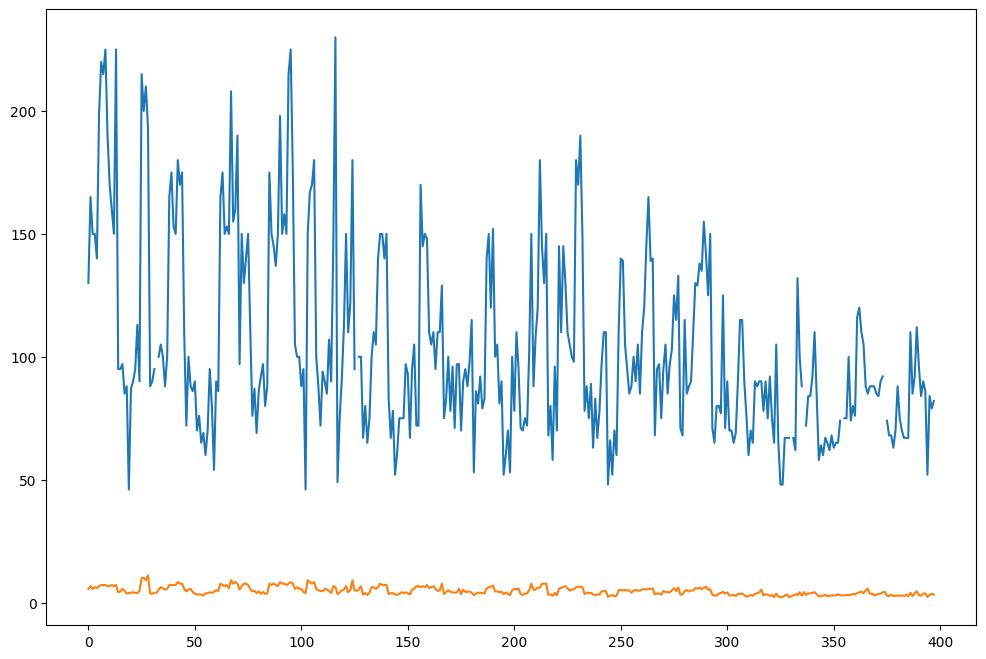

In [96]:
cars.horsepower.plot(figsize = (12,8))
cars.gpm.plot(figsize = (12,8))
plt.show()

In [97]:
mean_horsepower = cars.horsepower.mean()
mean_gpm = cars.gpm.mean()
 
std_horsepower = cars.horsepower.std()
std_gpm = cars.gpm.std()

In [98]:
cars["horsepower_z"] = round((cars.horsepower - mean_horsepower) / std_horsepower ,2)
cars["gpm_z"] = round((cars.gpm - mean_gpm) / std_gpm,2)

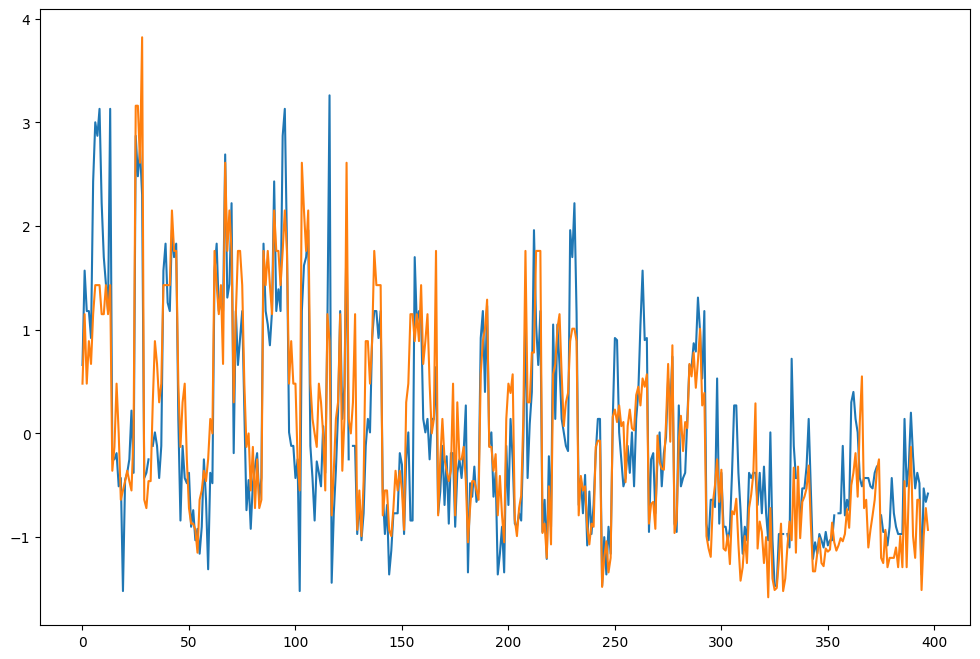

In [99]:
cars.horsepower_z.plot(figsize = (12,8))
cars.gpm_z.plot(figsize = (12,8))
plt.show()

141. __Transform__ the columns __model_year__ and __origin__ into (k-1) columns with __dummy variables__!

In [103]:
pd.get_dummies(cars, columns = ["model_year", "origin"])

,horsepower,gpm,manufacturer_name,continent,weight_cat,horsepower_z,gpm_z,model_year_1970-01-01 00:00:00,model_year_1971-01-01 00:00:00,model_year_1972-01-01 00:00:00,...,model_year_1976-01-01 00:00:00,model_year_1977-01-01 00:00:00,model_year_1978-01-01 00:00:00,model_year_1979-01-01 00:00:00,model_year_1980-01-01 00:00:00,model_year_1981-01-01 00:00:00,model_year_1982-01-01 00:00:00,origin_europe,origin_japan,origin_usa
0,130.0,5.56,chevrolet,north america,medium,0.66,0.48,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,165.0,6.67,buick,north america,heavy,1.57,1.15,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,150.0,5.56,plymouth,north america,medium,1.18,0.48,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,150.0,6.25,amc,north america,medium,1.18,0.89,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,140.0,5.88,ford,north america,medium,0.92,0.67,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,86.0,3.70,ford,north america,medium,-0.48,-0.64,0,0,0,...,0,0,0,0,0,0,1,0,0,1
394,52.0,2.27,vw,europe,light,-1.36,-1.51,0,0,0,...,0,0,0,0,0,0,1,1,0,0
395,84.0,3.12,dodge,north america,medium,-0.53,-0.99,0,0,0,...,0,0,0,0,0,0,1,0,0,1
396,79.0,3.57,ford,north america,medium,-0.66,-0.72,0,0,0,...,0,0,0,0,0,0,1,0,0,1
